In [5]:
# pip install missingno

In [ ]:
# pip install seaborn -U --upgrade

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12, 8)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
train = pd.read_csv("loan_train.csv")
test = pd.read_csv("loan_test.csv")

## Exploratory Data Analysis (EDA)

In [8]:
train.describe(include='all').style.background_gradient(cmap="tab10")

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
count,601,611,599,614,582,614.000000,614.000000,614.000000,600.000000,564.000000,614,614
unique,2,2,4,2,2,nan,nan,nan,nan,nan,3,2
top,Male,Yes,0,Graduate,No,nan,nan,nan,nan,nan,Semiurban,Y
freq,489,398,345,480,500,nan,nan,nan,nan,nan,233,422
mean,nan,nan,nan,nan,nan,540345.928339,162124.579803,14141042.345277,342.000000,0.842199,nan,nan
std,nan,nan,nan,nan,nan,610904.167339,292624.836922,8815682.464395,65.120410,0.364878,nan,nan
min,nan,nan,nan,nan,nan,15000.000000,0.000000,0.000000,12.000000,0.000000,nan,nan
25%,nan,nan,nan,nan,nan,287750.000000,0.000000,9800000.000000,360.000000,1.000000,nan,nan
50%,nan,nan,nan,nan,nan,381250.000000,118850.000000,12500000.000000,360.000000,1.000000,nan,nan
75%,nan,nan,nan,nan,nan,579500.000000,229725.000000,16475000.000000,360.000000,1.000000,nan,nan


In [9]:
test.describe(include='all').style.background_gradient(cmap="Pastel2")

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
count,356,367,357,367,344,367.000000,367.000000,367.000000,361.000000,338.000000,367
unique,2,2,4,2,2,nan,nan,nan,nan,nan,3
top,Male,Yes,0,Graduate,No,nan,nan,nan,nan,nan,Urban
freq,286,233,200,283,307,nan,nan,nan,nan,nan,140
mean,nan,nan,nan,nan,nan,480559.945504,156957.765668,13427792.915531,342.537396,0.825444,nan
std,nan,nan,nan,nan,nan,491068.539898,233423.209869,6296142.567929,65.156643,0.380150,nan
min,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000,6.000000,0.000000,nan
25%,nan,nan,nan,nan,nan,286400.000000,0.000000,10000000.000000,360.000000,1.000000,nan
50%,nan,nan,nan,nan,nan,378600.000000,102500.000000,12500000.000000,360.000000,1.000000,nan
75%,nan,nan,nan,nan,nan,506000.000000,243050.000000,15750000.000000,360.000000,1.000000,nan


In [10]:
train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
395,Male,Yes,2,Graduate,No,327600,48400.0,13500000,360.0,NaN,Semiurban,Y
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
146,Female,Yes,2,Graduate,No,1486600,0.0,7000000,360.0,1.0,Urban,Y
375,Male,Yes,0,Graduate,No,481700,92300.0,12000000,180.0,1.0,Urban,Y
414,Female,Yes,0,Not Graduate,No,214900,323700.0,17800000,360.0,0.0,Semiurban,N


In [11]:
print(train.shape, test.shape)

(614, 12) (367, 11)


## Missing data check

<Axes: >

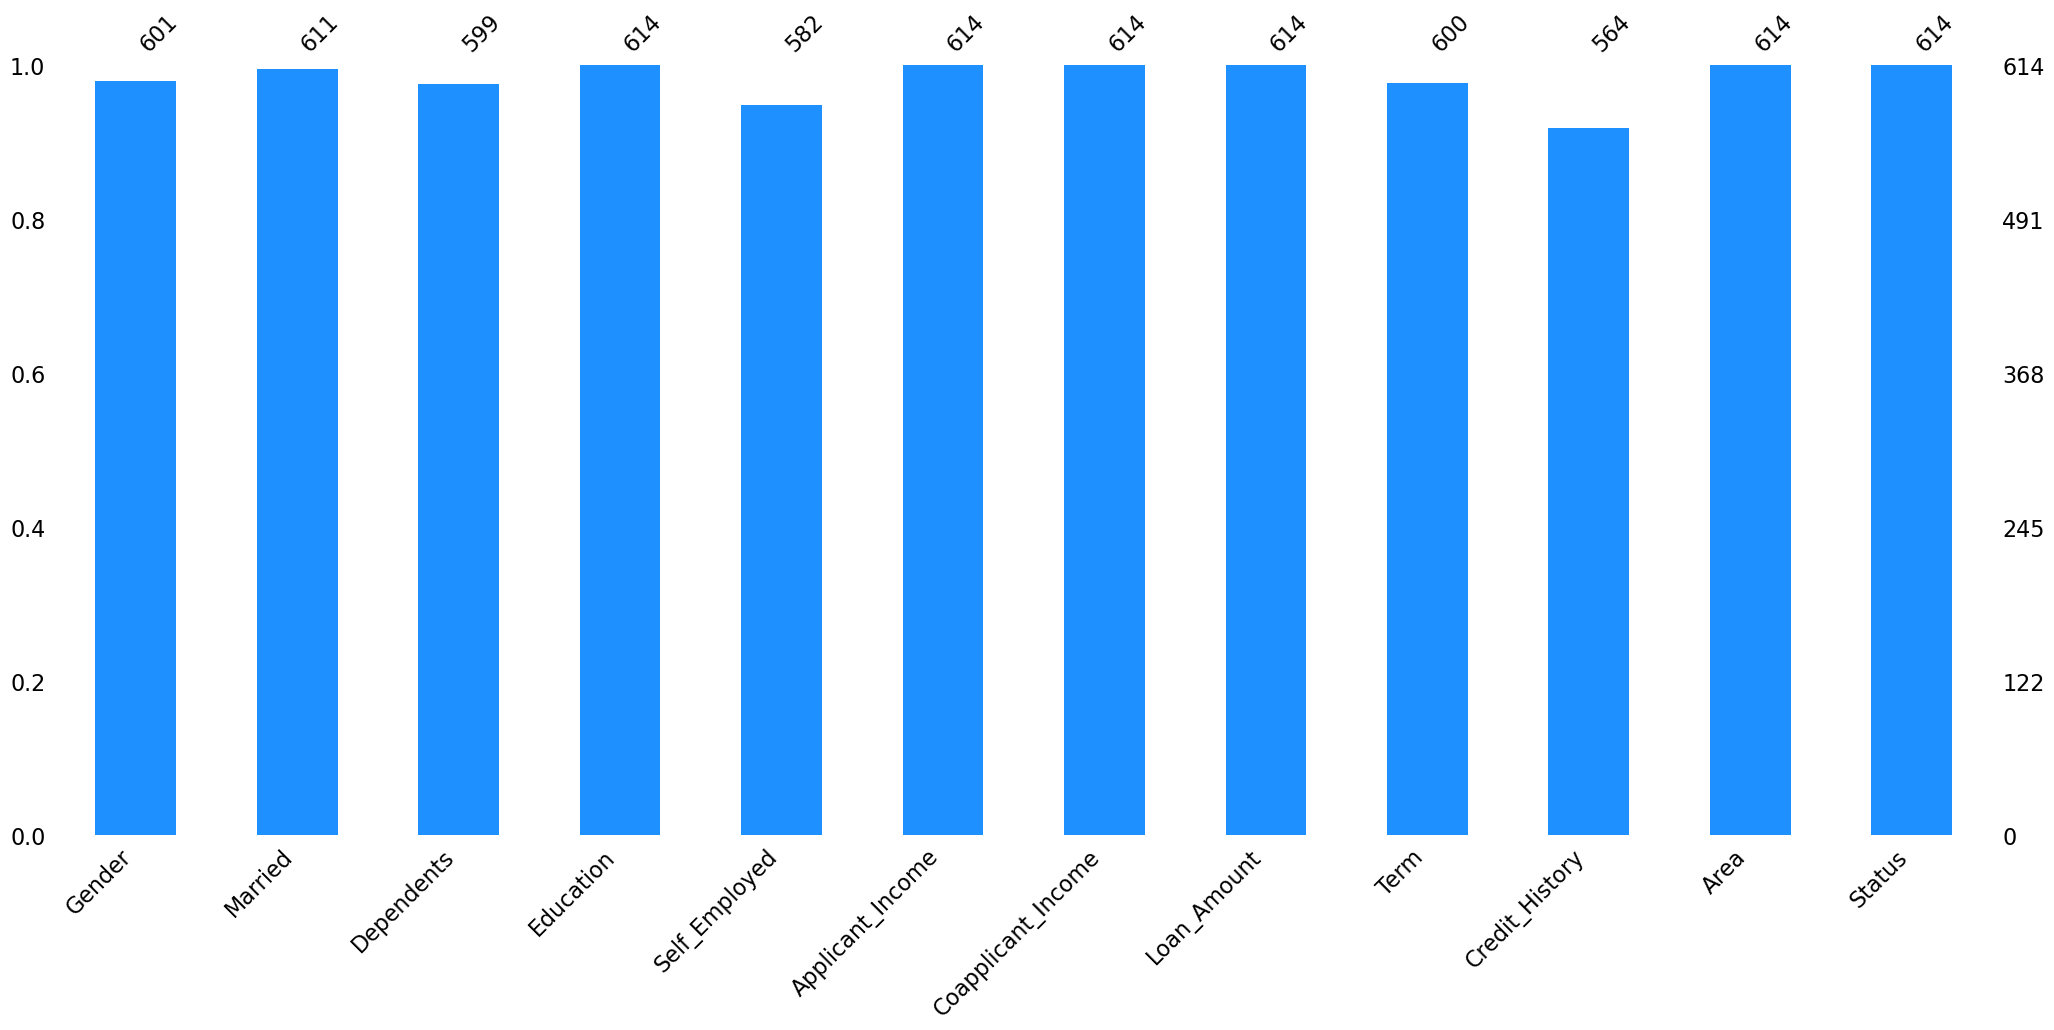

In [12]:
msno.bar(train, color="dodgerblue")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## Gender

In [14]:
train.Gender.value_counts(dropna = False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

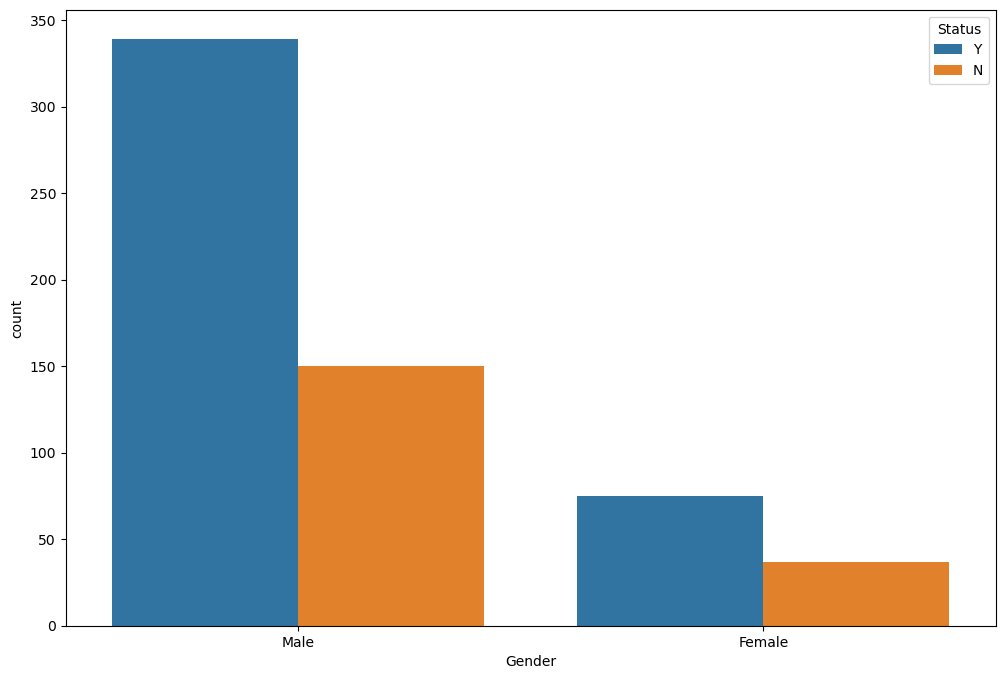

In [15]:
sns.countplot(x="Gender", data = train, hue='Status')
plt.show()

## Married vs Status

In [16]:
train.Married.value_counts(dropna = False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

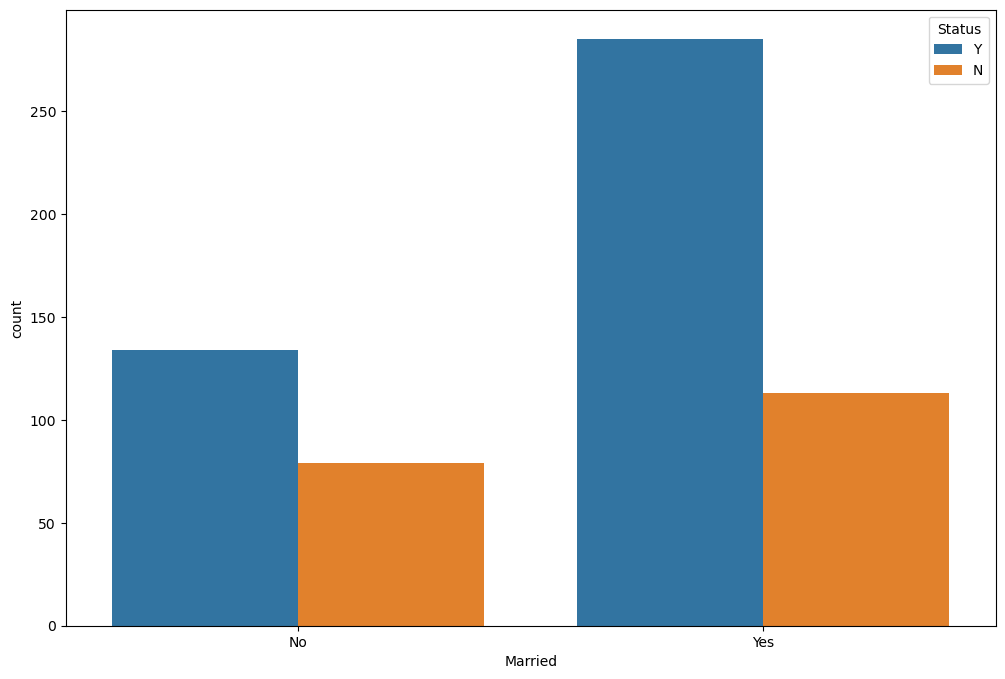

In [17]:
sns.countplot(x = "Married", data = train, hue='Status')
plt.show()

## Education

In [18]:
train.Education.value_counts(dropna = False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

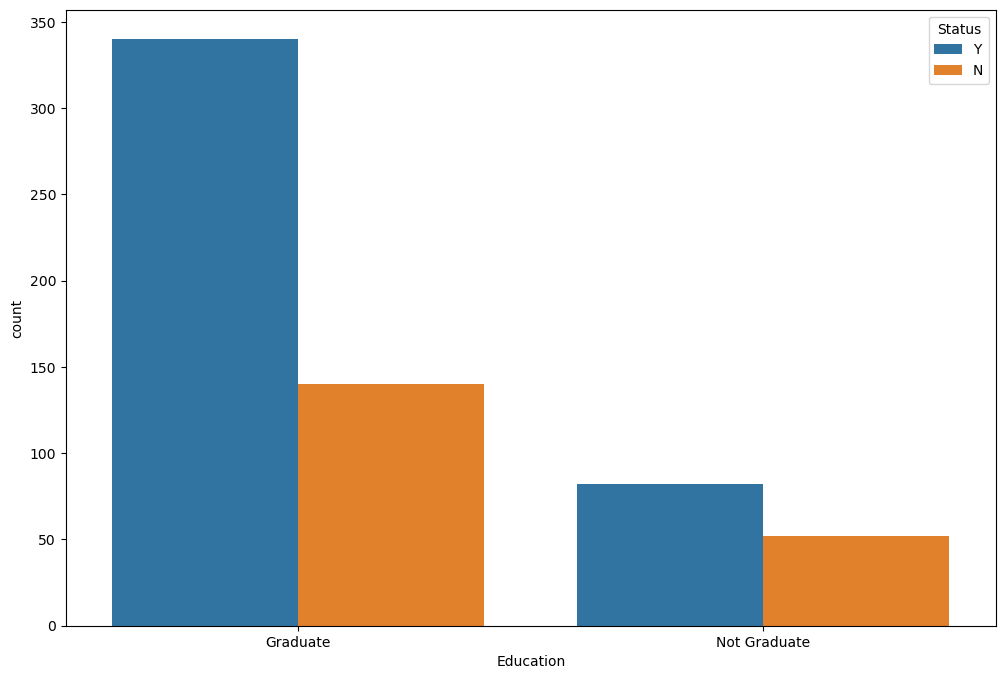

In [19]:
sns.countplot(x = "Education", data = train, hue='Status')
plt.show()

## Self_Employed vs Status

In [20]:
train.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

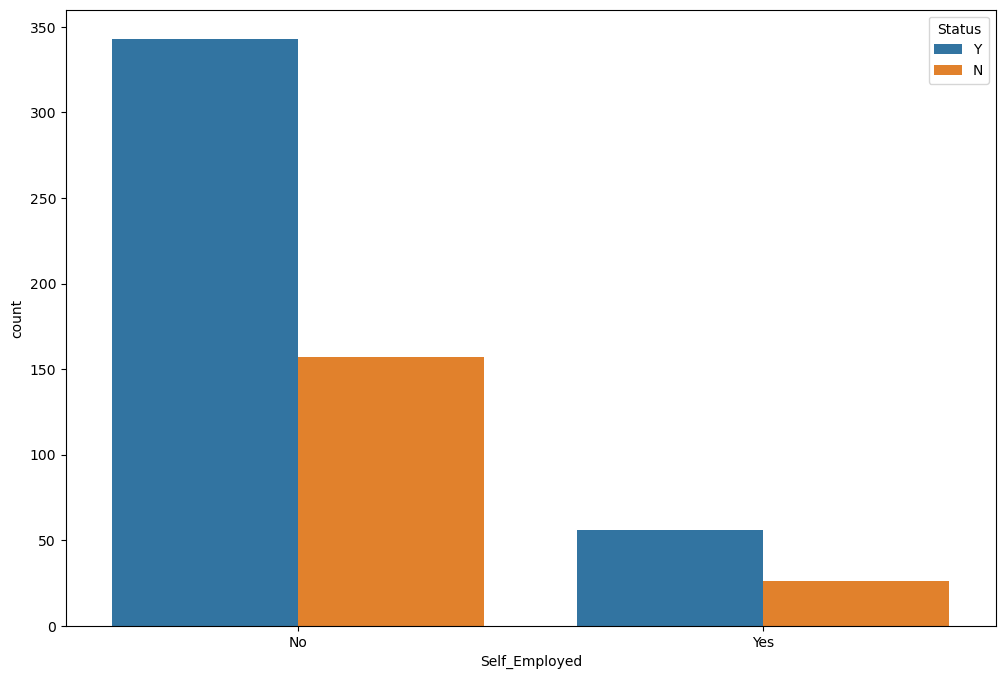

In [21]:
sns.countplot(x = "Self_Employed", data = train, hue='Status')
plt.show()

## Credit_History(1 means good credit) vs Status

In [22]:
train.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

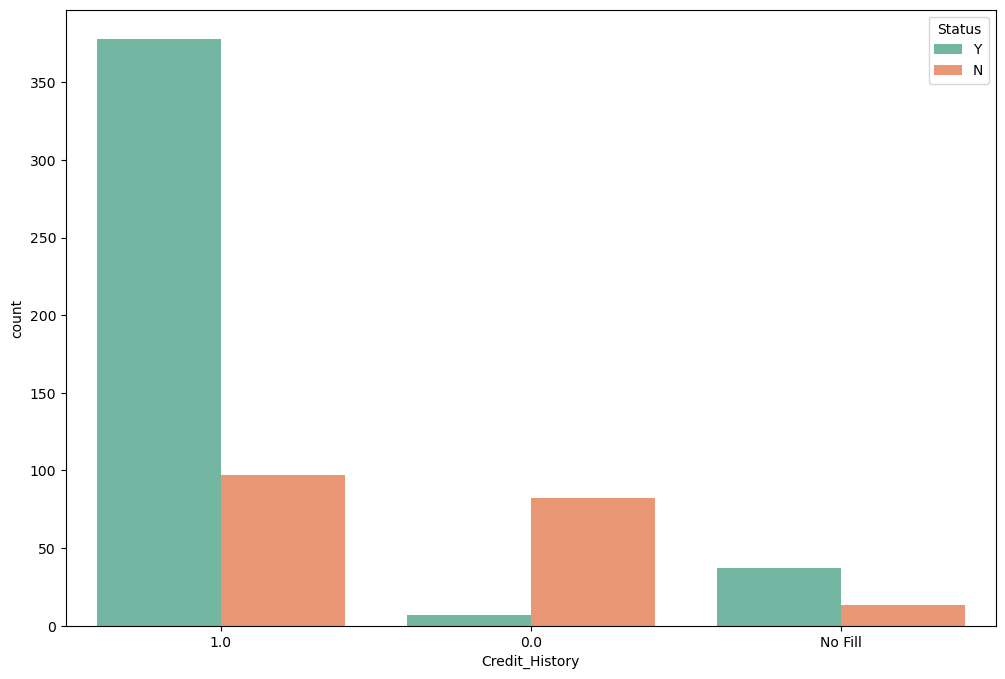

In [23]:
credit_h = train[['Credit_History','Status']]
credit_h = credit_h.fillna('No Fill')
sns.countplot(x = "Credit_History", data = credit_h, 
              hue = "Status", palette="Set2")
plt.show()

## Property Area

In [24]:
train.Area.value_counts(dropna=False)

Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

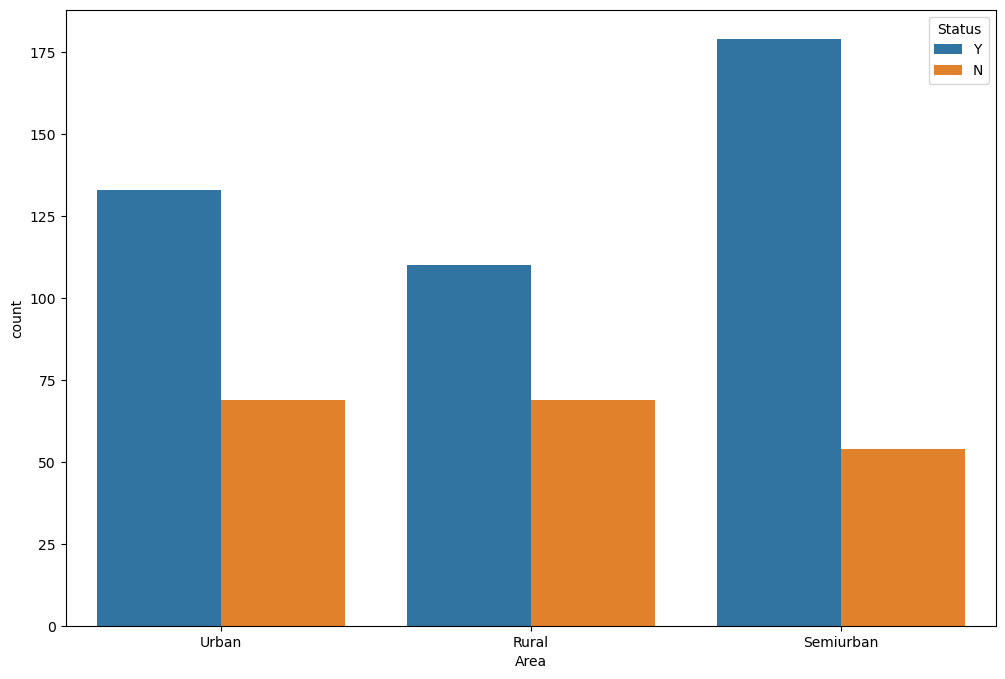

In [25]:
sns.countplot(x = "Area", data = train, 
              hue="Status", palette="tab10")
plt.show()

## Status

In [26]:
train.Status.value_counts(dropna=False)

Status
Y    422
N    192
Name: count, dtype: int64

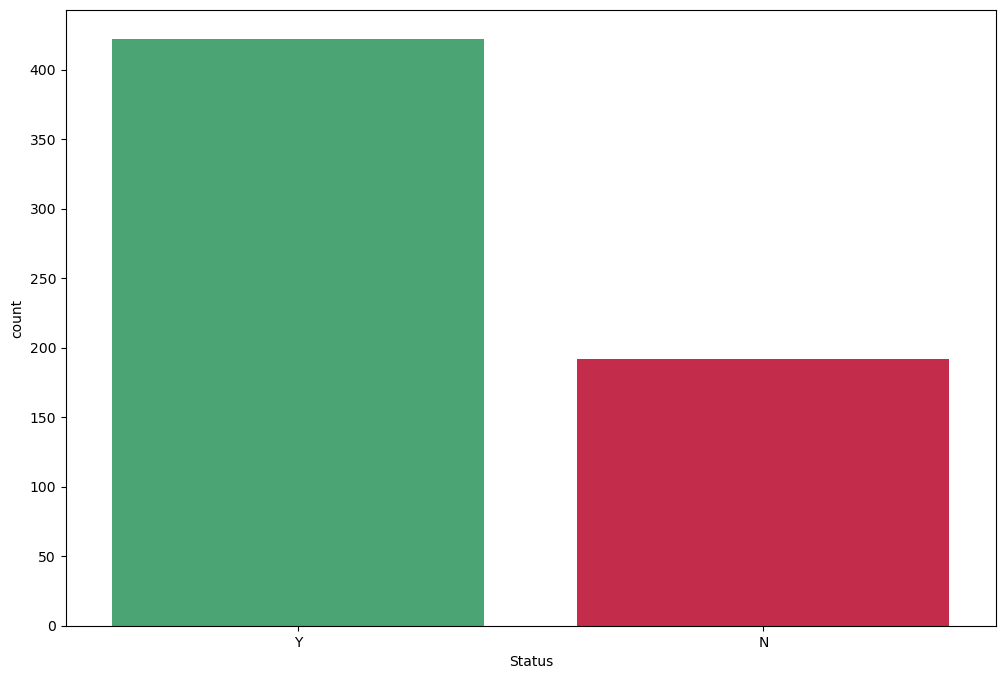

In [27]:
sns.countplot(x = "Status", data = train, 
              palette = {"Y": "#3CB372", "N": "#DC143C"})
plt.show()

## Loan Amount Term

In [28]:
train.Term.value_counts(dropna=False)

Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

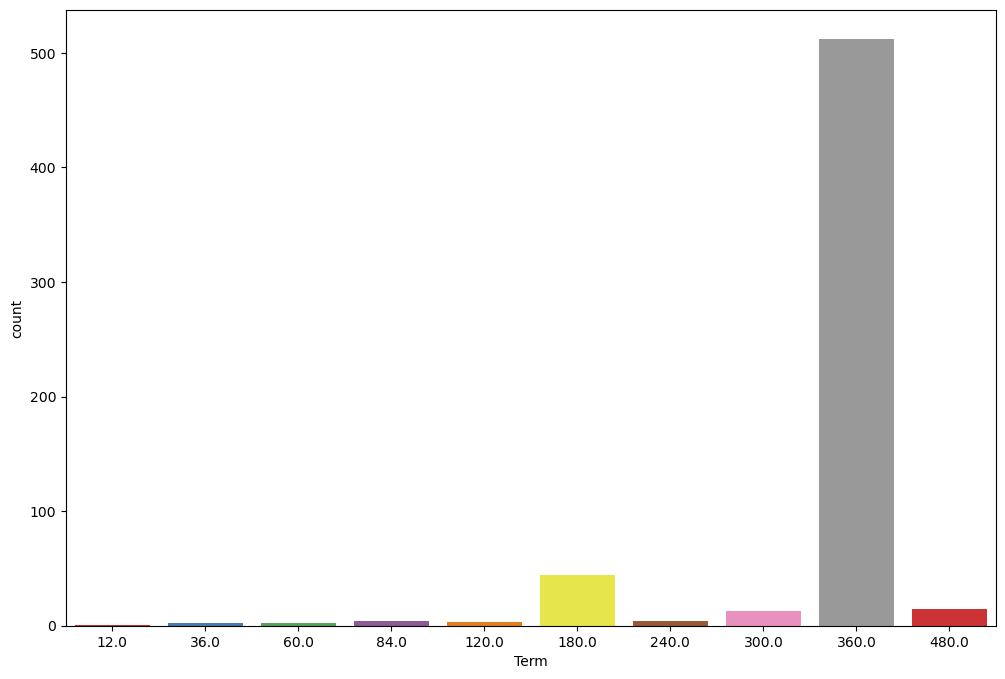

In [29]:
sns.countplot(data = train, x = "Term", palette = "Set1")
plt.show()

## Income vs Loan amount

In [30]:
train[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()\
.style.background_gradient(cmap="tab10")

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,614.000000,614.000000,614.000000
mean,540345.928339,162124.579803,14141042.345277
std,610904.167339,292624.836922,8815682.464395
min,15000.000000,0.000000,0.000000
25%,287750.000000,0.000000,9800000.000000
50%,381250.000000,118850.000000,12500000.000000
75%,579500.000000,229725.000000,16475000.000000
max,8100000.000000,4166700.000000,70000000.000000


## Income vs Loan amount Distribution

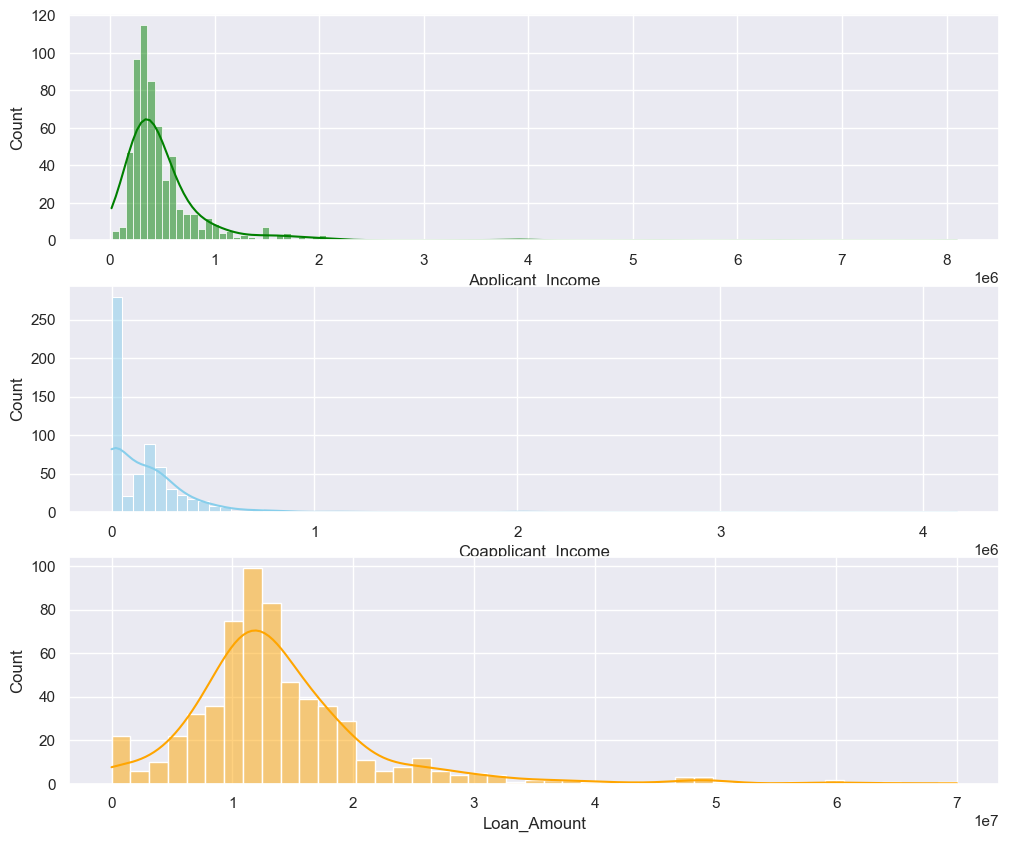

In [31]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
plt.subplot(311)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color = 'green')
plt.subplot(312)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color = 'skyblue')
plt.subplot(313)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color = 'orange');

## Heatmap

<Axes: >

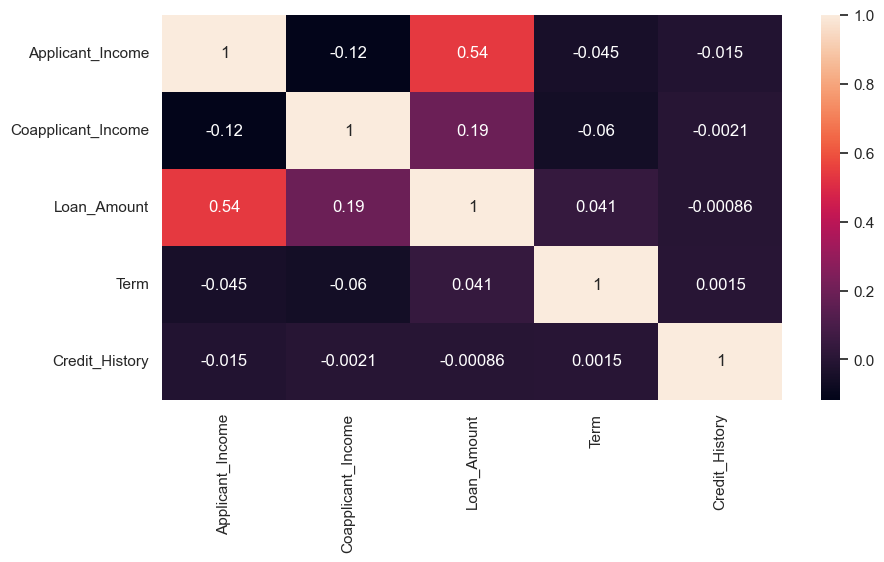

In [32]:
plt.figure(figsize = (10,5))
sns.heatmap(train.select_dtypes(include='number').corr(), annot = True)

## Applicants' Gender vs Married

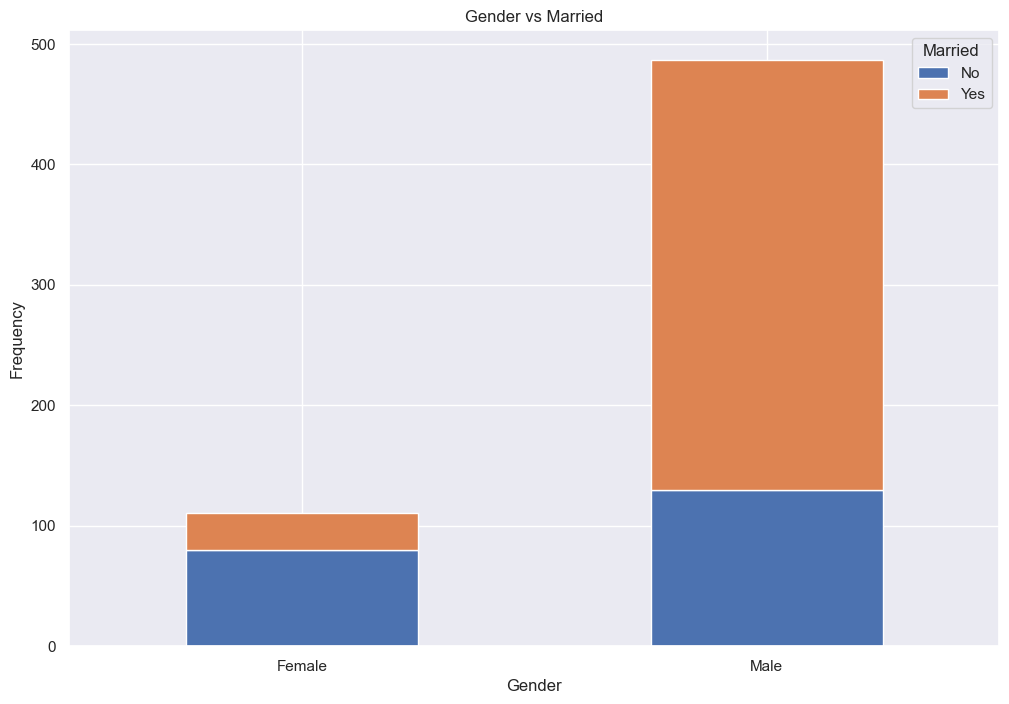

In [33]:
pd.crosstab(train.Gender, train.Married).plot(kind = "bar", stacked = True)  # matplotlib
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [34]:
pd.crosstab(train.Gender, train.Married)

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


## Self Employed vs Credit History

In [35]:
pd.crosstab(train.Self_Employed, train.Credit_History)

Credit_History,0.0,1.0
Self_Employed,,
No,76,387
Yes,12,63


In [36]:
# show the ratio instead
pd.crosstab(train.Self_Employed, train.Credit_History, normalize='index')

Credit_History,0.0,1.0
Self_Employed,,
No,0.164147,0.835853
Yes,0.160000,0.840000


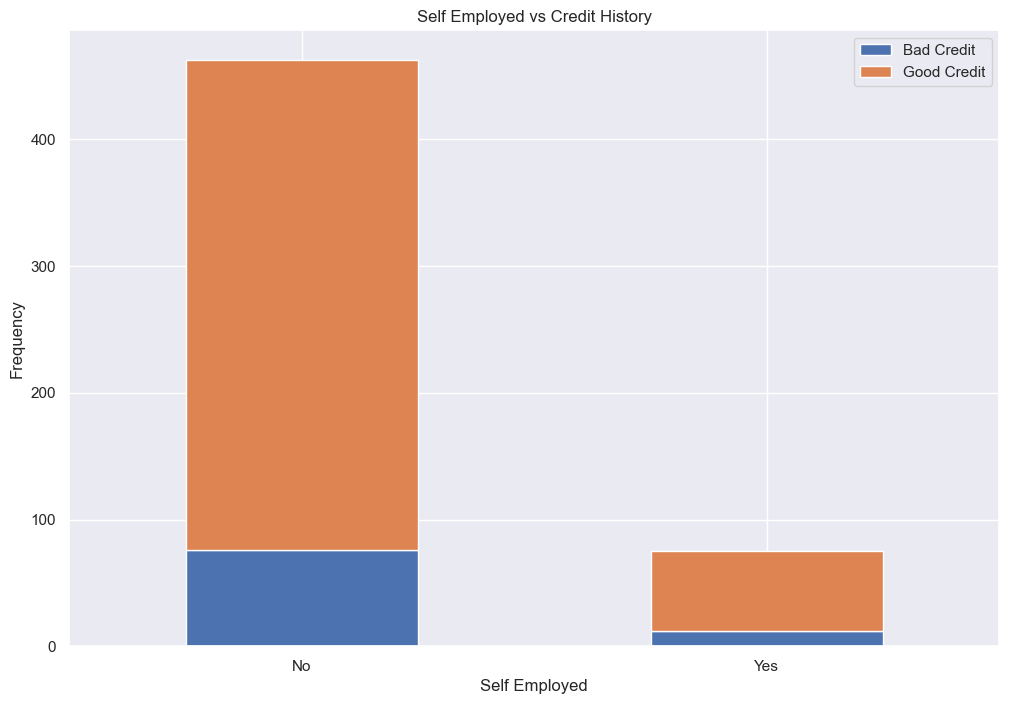

In [37]:
pd.crosstab(train.Self_Employed, 
    train.Credit_History).plot(kind = "bar", stacked = True)
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation = 0)
plt.show()

## Applicant income vs Status

In [38]:
train['Applicant_Income'].describe()

count    6.140000e+02
mean     5.403459e+05
std      6.109042e+05
min      1.500000e+04
25%      2.877500e+05
50%      3.812500e+05
75%      5.795000e+05
max      8.100000e+06
Name: Applicant_Income, dtype: float64

<Axes: xlabel='Applicant_Income', ylabel='Count'>

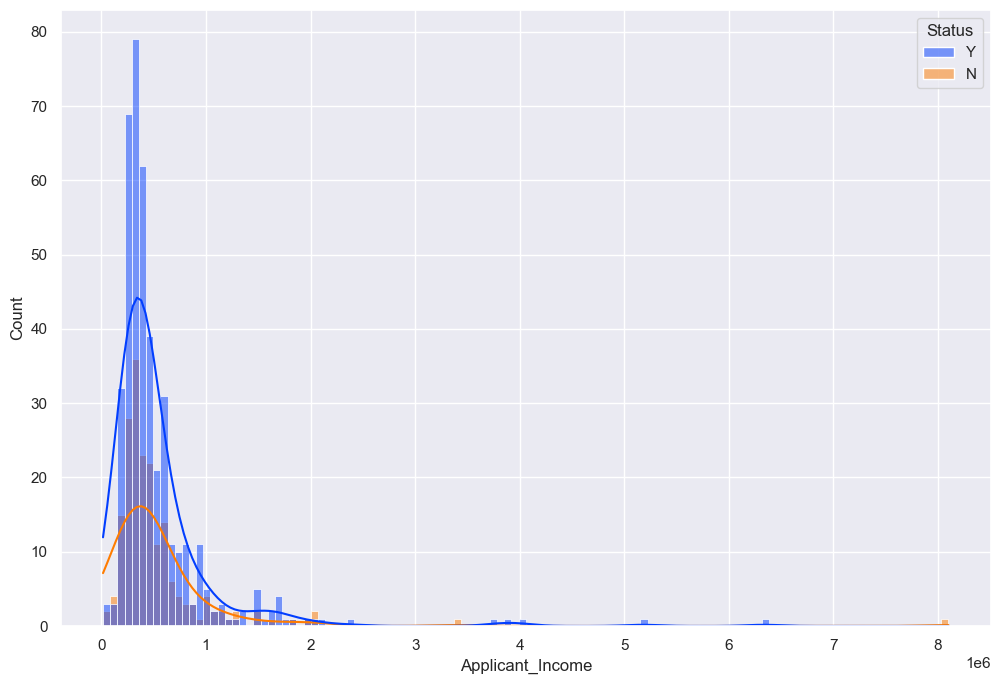

In [39]:
sns.histplot(train, x="Applicant_Income", hue="Status", 
             kde=True, palette="bright")

## Loan Amount vs Status

<Axes: xlabel='Loan_Amount', ylabel='Count'>

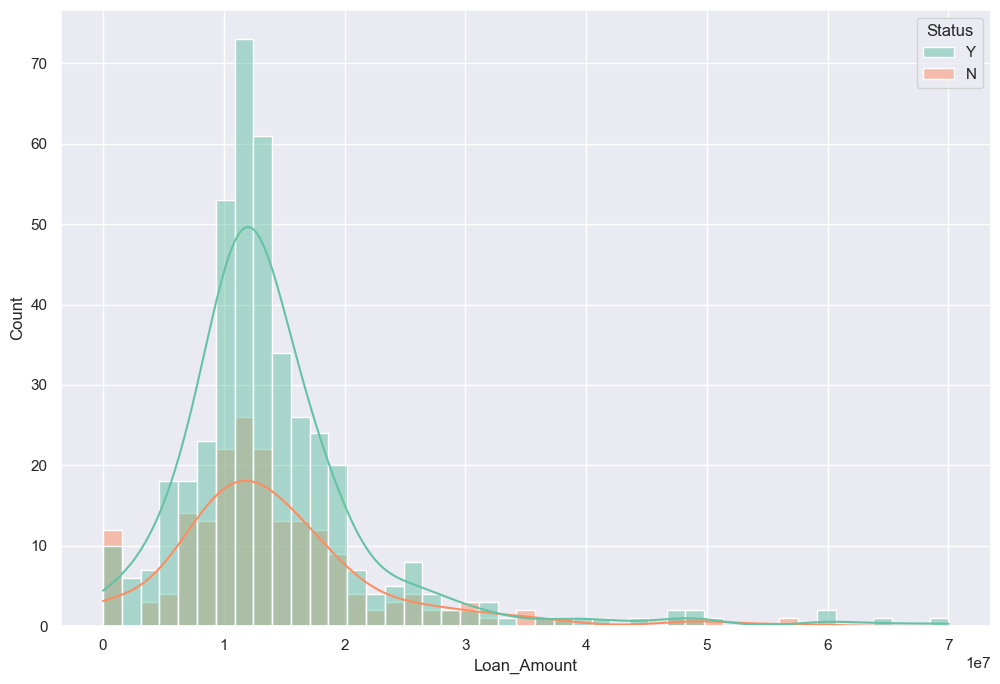

In [40]:
sns.histplot(train, x="Loan_Amount", hue="Status", 
             kde=True, palette="Set2")